In [2]:
from keras.datasets import mnist
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()

In [3]:
print(len(x_trains))
print(len(y_trains))
print(len(x_tests))
print(len(y_tests))

60000
60000
10000
10000


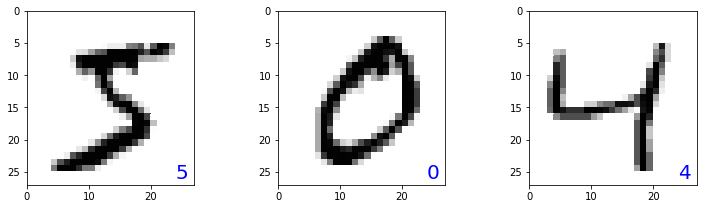

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(1, figsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    # 784個のRGB値を28×28の行列にする
    img = x_trains[id, :, :].reshape(28, 28)
    # 色相を反転させてプロットする
    plt.pcolor(255 - img)
    # 画像の正解値をプロット
    plt.text(24, 26, "%d" % y_trains[id],
    color='blue', fontsize=20)
    plt.xlim(0, 27) # x軸を0~28の範囲
    plt.ylim(27, 0) # y軸を28~0の範囲
plt.show()

In [5]:
x_trains = x_trains.reshape(60000, 784)

In [6]:
x_trains = (x_trains / 255.0 * 0.99) + 0.01

In [ ]:
import numpy as np
class neuralNetwork:
# ニューラルネットワークの初期化
def __init__(self,
    input_neurons, # 入力層のニューロン数
    hidden_neurons, # 隠れ層のニューロン数
    output_neurons, # 出力層のニューロン数
    learning_rate # 学習率
    ):
    # 入力層、隠れ層、出力層のニューロン数をインスタンス変数に代入
    self.inneurons = input_neurons # 入力層のニューロン数
    self.hneurons = hidden_neurons # 隠れ層のニューロン数
    self.oneurons = output_neurons # 出力層のニューロン数
    # 学習率をインスタンス変数に代入
    self.lr = learning_rate
    # weight_initialize()を呼ぶ
    self.weight_initialize()

    def weight_initialize(self):
        # 入力層と隠れ層の間のリンクの重みの初期値を設定
        self.w_h = np.random.normal(0.0, # 平均は0
        pow(self.inneurons, -0.5), # 標準偏差は入力層のニューロン数を元に計算
        (self.hneurons, # 隠れ層のニューロン数を行数
        self.inneurons + 1) # バイアスを加え、列数とする
        )
        # 隠れ層と出力層の間のリンクの重みの初期値を設定
        self.w_o = np.random.normal(0.0, # 平均は0
        pow(self.hneurons, -0.5), # 標準偏差は隠れ層のニューロン数を元に計算
        (self.oneurons, # 出力層のニューロン数を行数
        # 隠れ層のニューロン数に
        self.hneurons + 1) # バイアスを加え、列数とする
        )
        # シグモイド関数を活性化関数として定義
    def activation_function(self, x):
        return 1 / (1 + np.exp(-x))



In [7]:
from keras.datasets import mnist
(x_trains, y_trains), (x_tests, y_tests) = mnist.load_data()
# 60000x28x28の2次元配列を60000×784の行列に変換
x_trains = x_trains.reshape(60000, 784)
# データを255で割って0.99を掛けた後、0.01を加えてシフトする
x_trains = (x_trains / 255.0 * 0.99) + 0.01

In [8]:
import time
# 学習を行って結果を出力
start = time.time() # プログラムの開始時刻を取得
input_neurons = 784 # 入力層のニューロンの数
hidden_neuronss = 200 # 隠れ層のニューロンの数
output_neurons = 10 # 出力層のニューロンの数
learning_rate = 0.1 # 学習率
# neuralNetworkオブジェクトの生成
n = neuralNetwork(input_neurons,
hidden_neuronss,
output_neurons,
learning_rate)
# ニューラルネットワークの学習
# 学習を繰り返す回数
epochs = 5
for e in range(epochs):
    for (inputs, target) in zip(x_trains, y_trains):
        targets = np.zeros(output_neurons) + 0.01
        # 正解値に対応する要素を0.99にする
        targets[int(target)] = 0.99
        # 学習を実行
        n.train(inputs, # 訓練データの行列
        targets # 目標値の行列
        )
print('done')
# 処理にかかった時間を出

NameError: name 'neuralNetwork' is not defined

In [ ]:
y_tests[0]